In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd 
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC


In [2]:
data = pd.read_csv('final_with_covid_AS.csv')
data.head()

,CountCases,BedDys,BeddystoCC,Severity,DiedCases,DiedBdDys,Hsptlsns,April,August,December,...,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019,Y2020,Y2021,CovidPrd
0,17,133,7.823529,75,4,9,13,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,13,372,28.615385,63,4,34,9,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8,106,13.250000,48,4,13,4,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,45,218,4.844444,153,3,24,42,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,24,238,9.916667,90,3,8,21,0,1,0,...,1,0,0,0,0,0,0,0,0,0


In [3]:
data['Hsptlsns'].describe()

count    54038.000000
mean         6.751545
std         10.742018
min          0.000000
25%          1.000000
50%          3.000000
75%          7.000000
max        121.000000
Name: Hsptlsns, dtype: float64

In [4]:
data['Hsptlsns'] = np.log(data['Hsptlsns'])


/Users/amin/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [5]:
filtered_data = data

In [6]:

filtered_data['Bed_days_category'] = np.where(filtered_data['Hsptlsns'] >=1, 1, 0)

filtered_data['Bed_days_category'].value_counts()


1    28367
0    25671
Name: Bed_days_category, dtype: int64

In [7]:
filtered_data['Bed_days_category'].describe()

count    54038.000000
mean         0.524945
std          0.499382
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: Bed_days_category, dtype: float64

In [8]:
data['Hsptlsns'].describe()

count    5.403800e+04
mean             -inf
std               NaN
min              -inf
25%      0.000000e+00
50%      1.098612e+00
75%      1.945910e+00
max      4.795791e+00
Name: Hsptlsns, dtype: float64

In [9]:
filtered_data['Bed_days_category'].value_counts()

1    28367
0    25671
Name: Bed_days_category, dtype: int64

In [10]:
filtered_data['Bed_days_category']

0        1
1        1
2        1
3        1
4        1
        ..
54033    0
54034    0
54035    0
54036    0
54037    0
Name: Bed_days_category, Length: 54038, dtype: int64

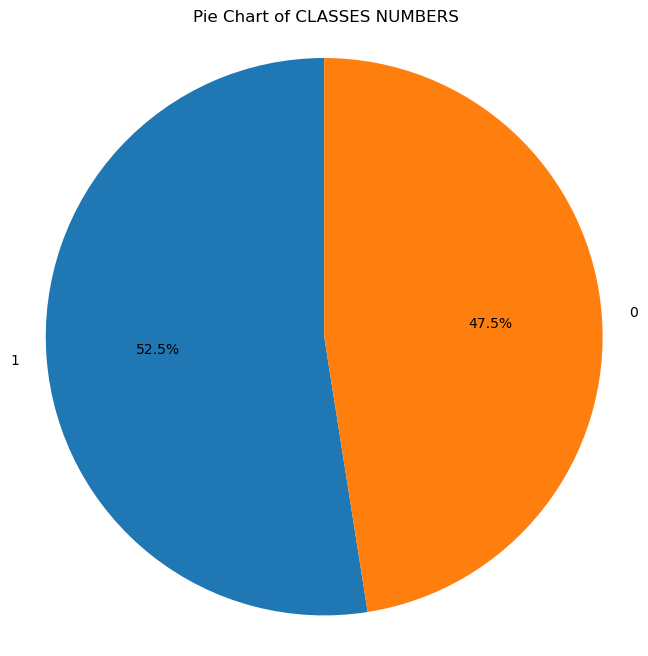

In [11]:
import matplotlib.pyplot as plt

value_counts = filtered_data['Bed_days_category'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  
plt.title('Pie Chart of CLASSES NUMBERS')
plt.show()

# XGBClassifier

In [12]:
from xgboost import XGBClassifier

X = filtered_data[['Age1725','Age2639','Age4064','Age6574','Age75plus',
                   'Male',
                   
                   'Regional',
                   'April','December','February','January','July',
                   'June','March','May','November','October','September',

                   'Cntrprt23WldMV','CntrprtFxdStnry','CntrprtHvyVhcl',
                   'CntrprtNClsn','CntrprtOther','CntrprtNMV','CntrprtCrTrkVn',
                   'CntrprtPdlC','CntrprtPdstAnml','CntrprtTrn',

                   'Y2014','Y2015','Y2016','Y2017','Y2018','Y2019','Y2020','Y2021',
                   'Y2013','Y2012',
                   'CovidPrd']]



y = filtered_data['Bed_days_category']



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)


# ارزیابی مدل
y_pred_xgb = xgb_model.predict(X_test)
acc_xgb = accuracy_score(y_test, y_pred_xgb)
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
class_report_xgb = classification_report(y_test, y_pred_xgb)

precision_xgb = precision_score(y_test, y_pred_xgb,
                                #average='macro'
                               )
recall_xgb = recall_score(y_test, y_pred_xgb,# average='macro'
                         )
f1_xgb = f1_score(y_test, y_pred_xgb, #average='macro'
                 )
print('Accuracy:', acc_xgb)
print('Confusion Matrix:\n', conf_matrix_xgb)
print('Classification Report:\n', class_report_xgb)
print('Precision:', precision_xgb)
print('Recall:', recall_xgb)
print('F1-score:', f1_xgb)

Accuracy: 0.7538860103626943
Confusion Matrix:
 [[5477 2265]
 [1725 6745]]
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.71      0.73      7742
           1       0.75      0.80      0.77      8470

    accuracy                           0.75     16212
   macro avg       0.75      0.75      0.75     16212
weighted avg       0.75      0.75      0.75     16212

Precision: 0.7486126526082131
Recall: 0.7963400236127509
F1-score: 0.7717391304347827


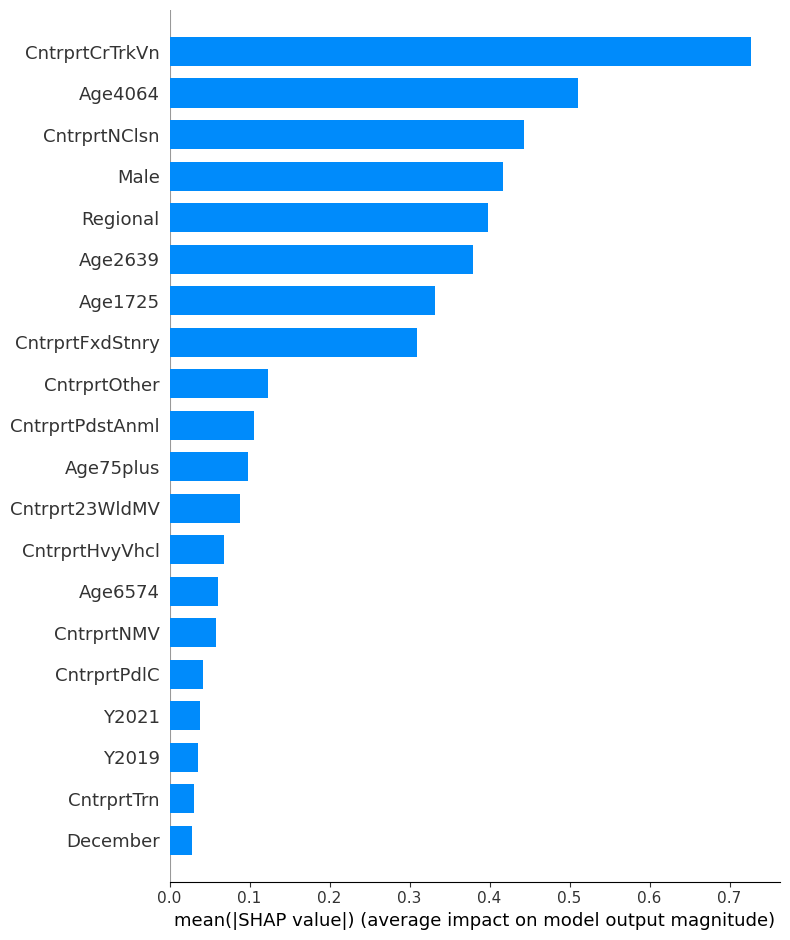

In [13]:
import shap

explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X_train)

feature_names = X_train.columns

shap.summary_plot(shap_values, X_train, feature_names=feature_names, plot_type='bar')


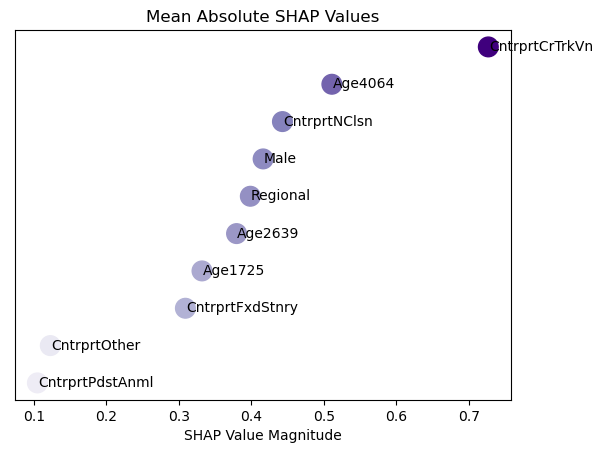

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable

mean_shap_values = np.abs(shap_values).mean(axis=0)

sorted_indices = np.argsort(mean_shap_values)

cmap = plt.get_cmap('Purples')
norm = plt.Normalize(mean_shap_values[sorted_indices].min(), mean_shap_values[sorted_indices].max())
colors = [cmap(norm(value)) for value in mean_shap_values[sorted_indices]]

#plt.figure(figsize=(15, 10))

top_features_indices = sorted_indices[-10:]  
plt.scatter(mean_shap_values[top_features_indices], range(len(top_features_indices)), color=colors[-10:], s=200)

for i, txt in enumerate([X_train.columns[i] for i in top_features_indices]):
    plt.text(mean_shap_values[top_features_indices][i] + 0.001, i, txt, va='center', ha='left')

plt.xlabel('SHAP Value Magnitude')
plt.title('Mean Absolute SHAP Values')

plt.yticks([])

plt.show()

# LogisticRegression

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

# Assuming filtered_data is your DataFrame containing the features and target variable

X = filtered_data[['Age1725', 'Age2639', 'Age4064', 'Age6574', 'Age75plus',
                  'Male',
                  'Regional',
                  'April', 'December', 'February', 'January', 'July',
                  'June', 'March', 'May', 'November', 'October', 'September',
                  'Cntrprt23WldMV', 'CntrprtFxdStnry', 'CntrprtHvyVhcl',
                  'CntrprtNClsn', 'CntrprtOther', 'CntrprtNMV', 'CntrprtCrTrkVn',
                  'CntrprtPdlC', 'CntrprtPdstAnml', 'CntrprtTrn',
                  'Y2014', 'Y2015', 'Y2016', 'Y2017', 'Y2018', 'Y2019', 'Y2020', 'Y2021',
                  'Y2013', 'Y2012',
                  'CovidPrd']]

y = filtered_data['Bed_days_category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a Logistic Regression model
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train, y_train)

# Evaluate the model
y_pred_lr = lr_model.predict(X_test)
acc_lr = accuracy_score(y_test, y_pred_lr)
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)
class_report_lr = classification_report(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)

print('Accuracy:', acc_lr)
print('Confusion Matrix:\n', conf_matrix_lr)
print('Classification Report:\n', class_report_lr)
print('Precision:', precision_lr)
print('Recall:', recall_lr)
print('F1-score:', f1_lr)

Accuracy: 0.7342092277325438
Confusion Matrix:
 [[5293 2449]
 [1860 6610]]
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.68      0.71      7742
           1       0.73      0.78      0.75      8470

    accuracy                           0.73     16212
   macro avg       0.73      0.73      0.73     16212
weighted avg       0.73      0.73      0.73     16212

Precision: 0.7296611104978474
Recall: 0.7804014167650531
F1-score: 0.7541787894346511


/Users/amin/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
import shap
import numpy as np

# Assuming lr_model is your logistic regression model
# Assuming X_train is your training data
# Assuming you have defined the model output you're interested in explaining (e.g., "probability")

# Initialize the KernelExplainer
explainer = shap.KernelExplainer(lr_model.predict_proba, X_train)

# Compute SHAP values
shap_values = explainer.shap_values(X_train)


Using 37826 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/37826 [00:00<?, ?it/s]

# MLPClassifier

In [20]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

# Assuming filtered_data is your DataFrame containing the features and target variable

X = filtered_data[['Age1725', 'Age2639', 'Age4064', 'Age6574', 'Age75plus',
                  'Male',
                  'Regional',
                  'April', 'December', 'February', 'January', 'July',
                  'June', 'March', 'May', 'November', 'October', 'September',
                  'Cntrprt23WldMV', 'CntrprtFxdStnry', 'CntrprtHvyVhcl',
                  'CntrprtNClsn', 'CntrprtOther', 'CntrprtNMV', 'CntrprtCrTrkVn',
                  'CntrprtPdlC', 'CntrprtPdstAnml', 'CntrprtTrn',
                  'Y2014', 'Y2015', 'Y2016', 'Y2017', 'Y2018', 'Y2019', 'Y2020', 'Y2021', 
                  'Y2013', 'Y2012',
                  'CovidPrd']]

y = filtered_data['Bed_days_category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

from sklearn.neural_network import MLPClassifier

# تعریف یک MLPClassifier با ساختار سفارشی
mlp_model = MLPClassifier(hidden_layer_sizes=(64, 32), activation='relu', random_state=42)

# آموزش مدل با داده‌های آموزشی
mlp_model.fit(X_train, y_train)
mlp_model.fit(X_train, y_train)

# Evaluate the model
y_pred_mlp = mlp_model.predict(X_test)
acc_mlp = accuracy_score(y_test, y_pred_mlp)
conf_matrix_mlp = confusion_matrix(y_test, y_pred_mlp)
class_report_mlp = classification_report(y_test, y_pred_mlp)
precision_mlp = precision_score(y_test, y_pred_mlp)
recall_mlp = recall_score(y_test, y_pred_mlp)
f1_mlp = f1_score(y_test, y_pred_mlp)

print('Accuracy:', acc_mlp)
print('Confusion Matrix:\n', conf_matrix_mlp)
print('Classification Report:\n', class_report_mlp)
print('Precision:', precision_mlp)
print('Recall:', recall_mlp)
print('F1-score:', f1_mlp)

/Users/amin/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy: 0.7268689859363434
Confusion Matrix:
 [[5532 2210]
 [2218 6252]]
Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.71      0.71      7742
           1       0.74      0.74      0.74      8470

    accuracy                           0.73     16212
   macro avg       0.73      0.73      0.73     16212
weighted avg       0.73      0.73      0.73     16212

Precision: 0.738832427322146
Recall: 0.7381345926800472
F1-score: 0.738483345145287


/Users/amin/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


# DecisionTreeClassifier

In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

# Assuming filtered_data is your DataFrame containing the features and target variable

X = filtered_data[['Age1725', 'Age2639', 'Age4064', 'Age6574', 'Age75plus',
                  'Male',
                  'Regional',
                  'April', 'December', 'February', 'January', 'July',
                  'June', 'March', 'May', 'November', 'October', 'September',
                  'Cntrprt23WldMV', 'CntrprtFxdStnry', 'CntrprtHvyVhcl',
                  'CntrprtNClsn', 'CntrprtOther', 'CntrprtNMV', 'CntrprtCrTrkVn',
                  'CntrprtPdlC', 'CntrprtPdstAnml', 'CntrprtTrn',
                  'Y2014', 'Y2015', 'Y2016', 'Y2017', 'Y2018', 'Y2019', 'Y2020', 'Y2021', 
                  'Y2013', 'Y2012',
                  'CovidPrd']]

y = filtered_data['Bed_days_category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a Decision Tree classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Evaluate the model
y_pred_dt = dt_model.predict(X_test)
acc_dt = accuracy_score(y_test, y_pred_dt)
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
class_report_dt = classification_report(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)

print('Accuracy:', acc_dt)
print('Confusion Matrix:\n', conf_matrix_dt)
print('Classification Report:\n', class_report_dt)
print('Precision:', precision_dt)
print('Recall:', recall_dt)
print('F1-score:', f1_dt)

Accuracy: 0.6484085862324205
Confusion Matrix:
 [[5406 2336]
 [3364 5106]]
Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.70      0.65      7742
           1       0.69      0.60      0.64      8470

    accuracy                           0.65     16212
   macro avg       0.65      0.65      0.65     16212
weighted avg       0.65      0.65      0.65     16212

Precision: 0.6861058855146466
Recall: 0.6028335301062574
F1-score: 0.6417797888386123


# RandomForestClassifier

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

# Assuming filtered_data is your DataFrame containing the features and target variable

X = filtered_data[['Age1725', 'Age2639', 'Age4064', 'Age6574', 'Age75plus',
                  'Male',
                  'Regional',
                  'April', 'December', 'February', 'January', 'July',
                  'June', 'March', 'May', 'November', 'October', 'September',
                  'Cntrprt23WldMV', 'CntrprtFxdStnry', 'CntrprtHvyVhcl',
                  'CntrprtNClsn', 'CntrprtOther', 'CntrprtNMV', 'CntrprtCrTrkVn',
                  'CntrprtPdlC', 'CntrprtPdstAnml', 'CntrprtTrn',
                  'Y2014', 'Y2015', 'Y2016', 'Y2017', 'Y2018', 'Y2019', 'Y2020', 'Y2021',
                  'Y2013', 'Y2012',
                  'CovidPrd']]

y = filtered_data['Bed_days_category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a Random Forest classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Evaluate the model
y_pred_rf = rf_model.predict(X_test)
acc_rf = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
class_report_rf = classification_report(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

print('Accuracy:', acc_rf)
print('Confusion Matrix:\n', conf_matrix_rf)
print('Classification Report:\n', class_report_rf)
print('Precision:', precision_rf)
print('Recall:', recall_rf)
print('F1-score:', f1_rf)

Accuracy: 0.6807303232173698
Confusion Matrix:
 [[5102 2640]
 [2536 5934]]
Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.66      0.66      7742
           1       0.69      0.70      0.70      8470

    accuracy                           0.68     16212
   macro avg       0.68      0.68      0.68     16212
weighted avg       0.68      0.68      0.68     16212

Precision: 0.6920923722883136
Recall: 0.700590318772137
F1-score: 0.6963154189157476


# svm

In [23]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

# Assuming filtered_data is your DataFrame containing the features and target variable

X = filtered_data[['Age1725', 'Age2639', 'Age4064', 'Age6574', 'Age75plus',
                  'Male',
                  'Regional',
                  'April', 'December', 'February', 'January', 'July',
                  'June', 'March', 'May', 'November', 'October', 'September',
                  'Cntrprt23WldMV', 'CntrprtFxdStnry', 'CntrprtHvyVhcl',
                  'CntrprtNClsn', 'CntrprtOther', 'CntrprtNMV', 'CntrprtCrTrkVn',
                  'CntrprtPdlC', 'CntrprtPdstAnml', 'CntrprtTrn',
                  'Y2014', 'Y2015', 'Y2016', 'Y2017', 'Y2018', 'Y2019', 'Y2020', 'Y2021', 
                  'Y2013', 'Y2012',
                  'CovidPrd']]

y = filtered_data['Bed_days_category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create an SVM classifier
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)

# Evaluate the model
y_pred_svm = svm_model.predict(X_test)
acc_svm = accuracy_score(y_test, y_pred_svm)
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
class_report_svm = classification_report(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)

print('Accuracy:', acc_svm)
print('Confusion Matrix:\n', conf_matrix_svm)
print('Classification Report:\n', class_report_svm)
print('Precision:', precision_svm)
print('Recall:', recall_svm)
print('F1-score:', f1_svm)

Accuracy: 0.7659141376757957
Confusion Matrix:
 [[5635 2107]
 [1688 6782]]
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.73      0.75      7742
           1       0.76      0.80      0.78      8470

    accuracy                           0.77     16212
   macro avg       0.77      0.76      0.76     16212
weighted avg       0.77      0.77      0.77     16212

Precision: 0.7629654629317133
Recall: 0.8007083825265644
F1-score: 0.7813814159801832


In [ ]:
from sklearn.linear_model import LogisticRegression, RidgeClassifier, SGDClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier, AdaBoostClassifier, HistGradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import VotingClassifier, BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier, SGDClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier, AdaBoostClassifier, HistGradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier


# Create the list of base models
base_models = [
    #('logreg', LogisticRegression(random_state=42)),
    #('ridge', RidgeClassifier(random_state=42)),
    #('sgd', SGDClassifier(random_state=42)),
    #('rf', RandomForestClassifier(random_state=42)),
   #('gb', GradientBoostingClassifier(random_state=42)),
    #('ab', AdaBoostClassifier(random_state=42)),
   #('hgb', HistGradientBoostingClassifier(random_state=42)),
    #('et', ExtraTreesClassifier(random_state=42)),
    #('xgb', XGBClassifier(random_state=42)),
    #('lgbm', LGBMClassifier(random_state=42)),
    #('cb', CatBoostClassifier(random_state=42, verbose=0)),  # verbose=0 to silence CatBoost output
    #('knn', KNeighborsClassifier()),
    #('svc', SVC(probability=True, random_state=42)),
    #('gnb', GaussianNB()),
    #('mlp', MLPClassifier(hidden_layer_sizes=(64, 32), activation='relu', random_state=42)),
    #('dt', DecisionTreeClassifier(random_state=42)),
]

# Use the VotingClassifier with the base models
voting_model = VotingClassifier(estimators=base_models, voting='soft')

# Train the voting model
voting_model.fit(X_train, y_train)

# Evaluate the voting model
y_pred = voting_model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(class_report)
print('Accuracy:', acc)
print('Confusion Matrix:\n', conf_matrix)

In [80]:
f1 = f1_score(y_test, y_pred)
f1

0.7781801460021843

In [81]:
# Evaluate the model
#y_pred_svm = svm_model.predict(X_test)
acc_svm = accuracy_score(y_test, y_pred)
conf_matrix_svm = confusion_matrix(y_test, y_pred)
class_report_svm = classification_report(y_test, y_pred)
precision_svm = precision_score(y_test, y_pred)
recall_svm = recall_score(y_test, y_pred)
f1_svm = f1_score(y_test, y_pred)

print('Accuracy:', acc_svm)
print('Confusion Matrix:\n', conf_matrix_svm)
print('Classification Report:\n', class_report_svm)
print('Precision:', precision_svm)
print('Recall:', recall_svm)
print('F1-score:', f1_svm)

Accuracy: 0.7619664446089317
Confusion Matrix:
 [[5584 2158]
 [1701 6769]]
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.72      0.74      7742
           1       0.76      0.80      0.78      8470

    accuracy                           0.76     16212
   macro avg       0.76      0.76      0.76     16212
weighted avg       0.76      0.76      0.76     16212

Precision: 0.7582614540159068
Recall: 0.7991735537190082
F1-score: 0.7781801460021843


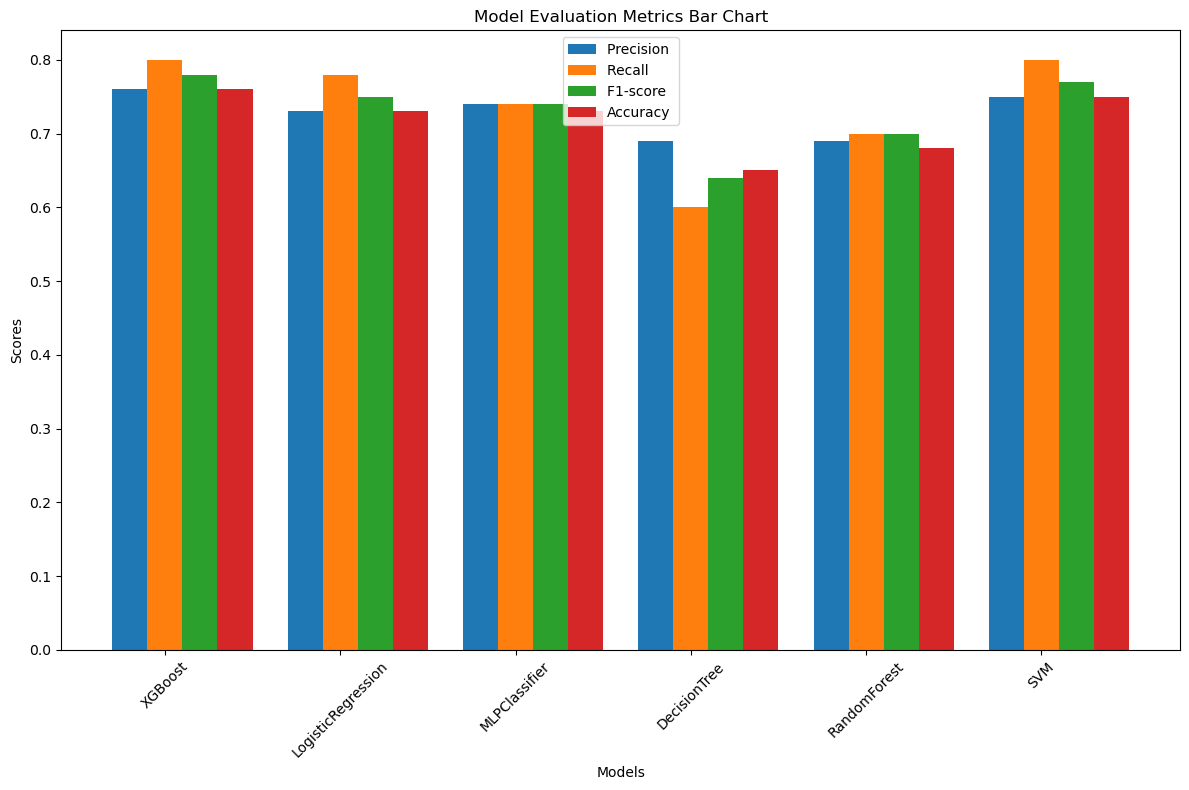

In [1]:
import numpy as np
import matplotlib.pyplot as plt

models = ['XGBoost', 'LogisticRegression', 'MLPClassifier', 'DecisionTree', 'RandomForest', 'SVM']
metrics = ['Precision', 'Recall', 'F1-score']




precision = [0.76,      0.73,            
             0.74,
             
             
             0.69,
             

             0.69, 
             
     
             0.75]




recall_minority = [0.80,     0.78,
                   0.74, 
                   
                   
                   0.60,
   
                   0.70, 
                   
     0.80]





f1_minority = [0.78, 0.75, 
               0.74, 
               
               
               0.64
  
               , 0.70,
               
    0.77]




accuracy=[0.76,0.73, 0.73, 0.65, 
  
          0.68,
          
          
          
          
          
          
          0.75
]






x = np.arange(len(models))
width = 0.2  

# اندازه‌دهی نمودار
plt.figure(figsize=(12, 8))

# رسم میله‌ها
plt.bar(x - width, precision, width, label='Precision ')
plt.bar(x, recall_minority, width, label='Recall ')
plt.bar(x + width, f1_minority, width, label='F1-score ')
plt.bar(x + 2 * width, accuracy, width, label='Accuracy')

plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Model Evaluation Metrics Bar Chart')
plt.xticks(x, models, rotation=45)
plt.legend()

plt.tight_layout()
plt.show()
